In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
D=pd.read_csv("../Housing Prices/train.csv")

In [3]:
D.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
# D.head()

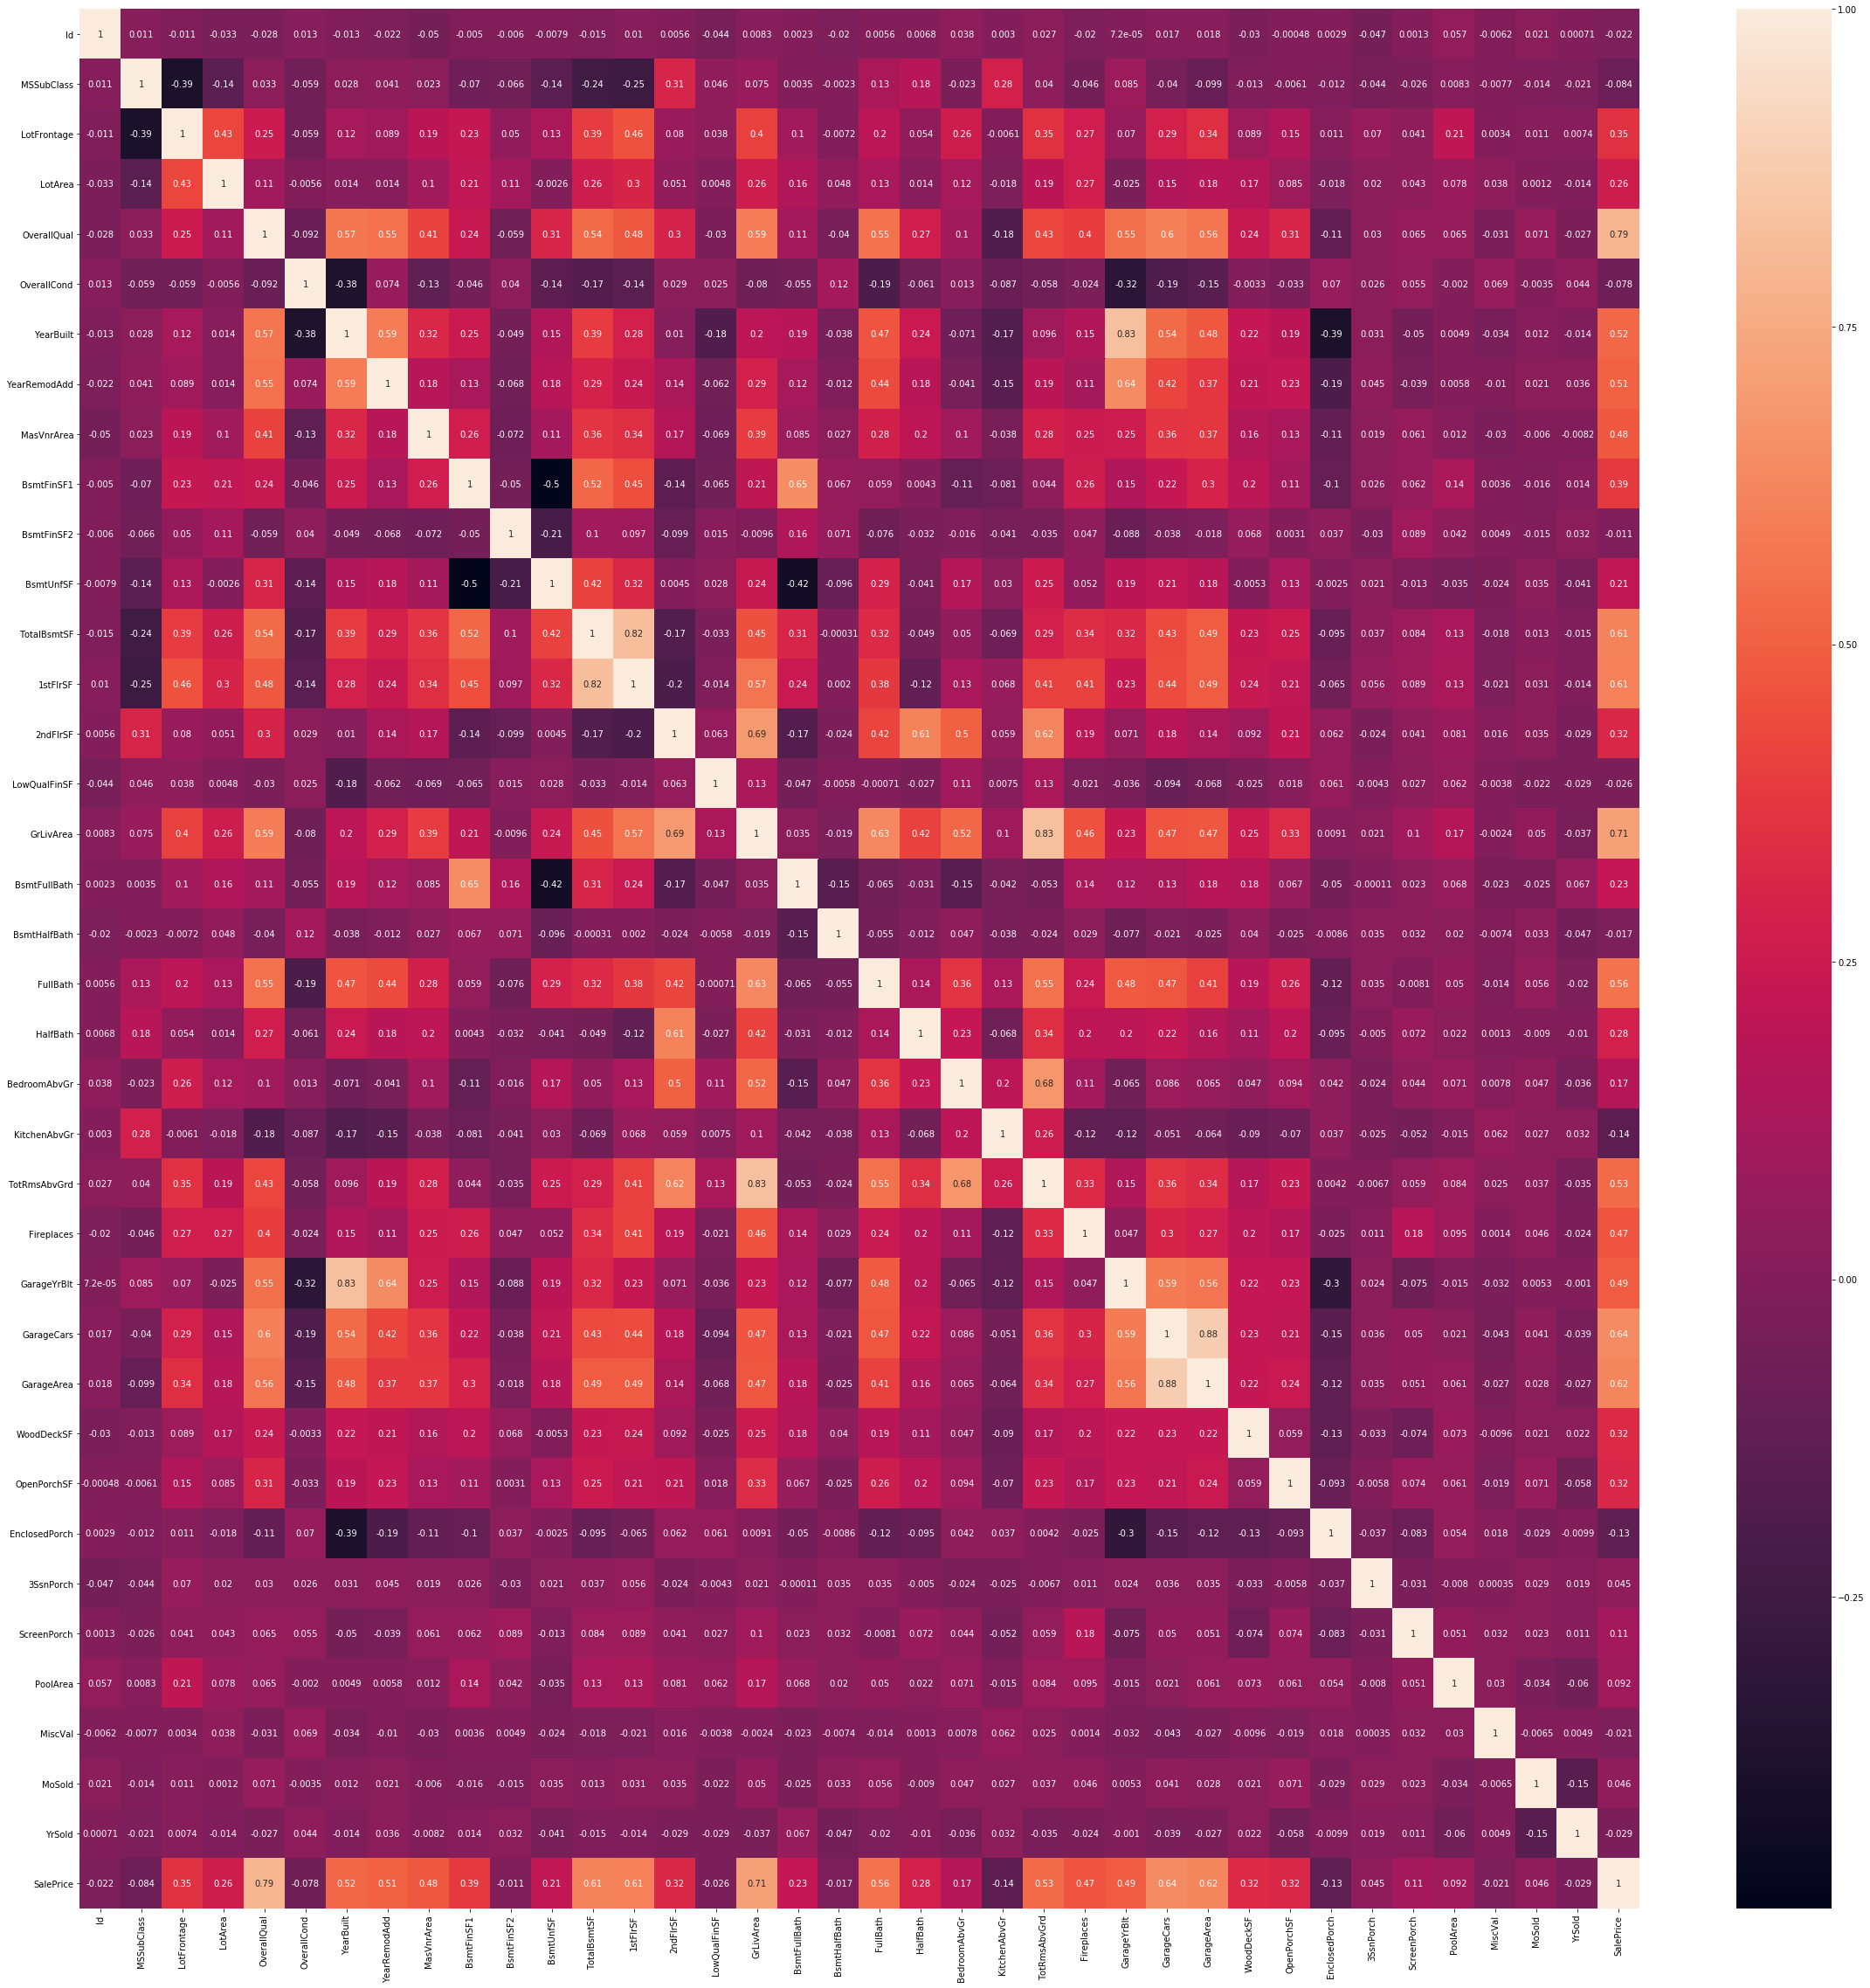

In [5]:

fig, ax=plt.subplots(figsize=(40,40))
sns.heatmap(D.corr(),annot=True)
# xlable("D.columns"

there are a lot of features that are highly correlated. for example first floor area and basement area. what I could do is find correlated features and combine them using factor analysis or partial least squares. Before doing that manually, i'll give it  a go with PCA. 


Prior to PCA, I should take a look at some key relations, visualise.

another thing I must do is adress data type and encoding. 

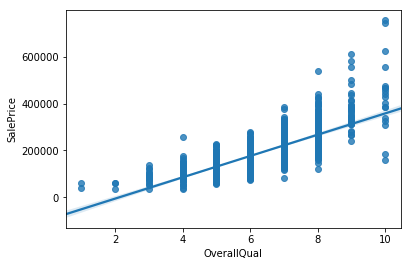

In [6]:
sns.regplot(x=D.OverallQual, y=D.SalePrice);
# it seems like there is alinear relation however we have a lot of deviation in quality for each price bar. 

It seems a good idea to manually sort the features and group for plotting purposes and later on to examin correlation. I can do this by simply checking which values correlate but i"l use old school pencil and paper.It got tedious. lol

In [7]:
def encoder(var):
    return var.astype("category").cat.codes
    

In [7]:
Objects=D.columns[D.dtypes==object]
# D[Objects]

I want to encode all of these. I'll first check which of these has too many categries and needs some outlier fixing etc. All extra categories will go into something like "others". To do this I want to see how it all looks. I am lazy so I am going to try to build a function that plots all of these.

/home/charlie/environments/PFDS/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


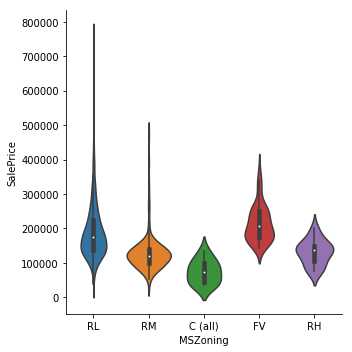

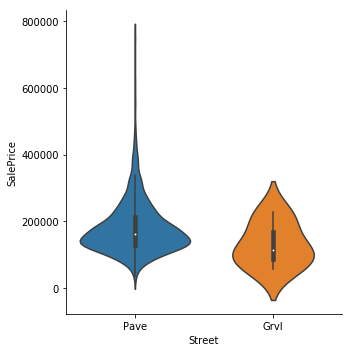

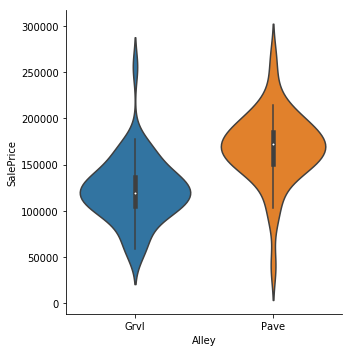

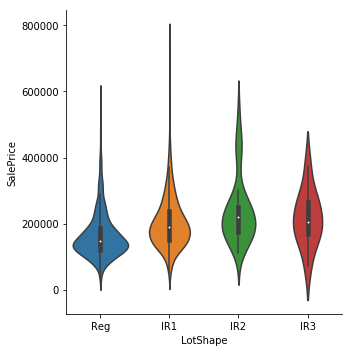

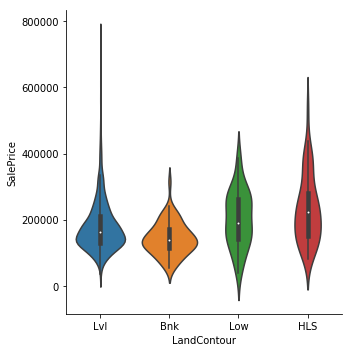

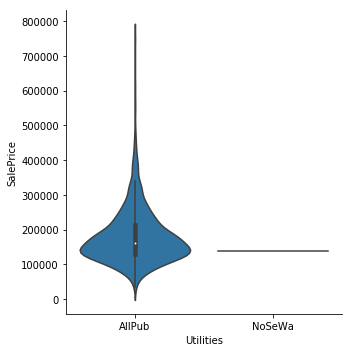

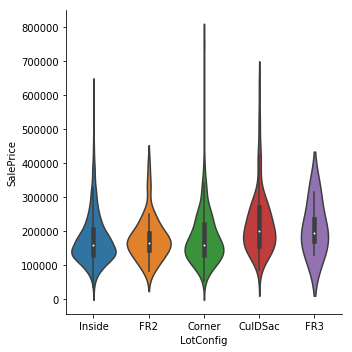

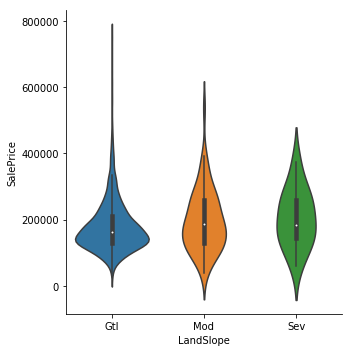

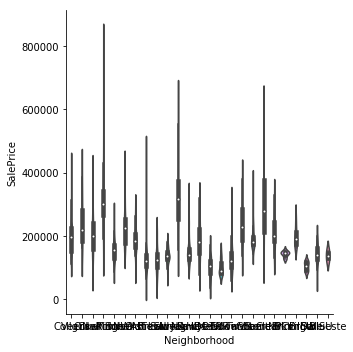

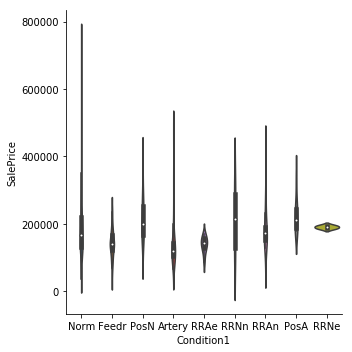

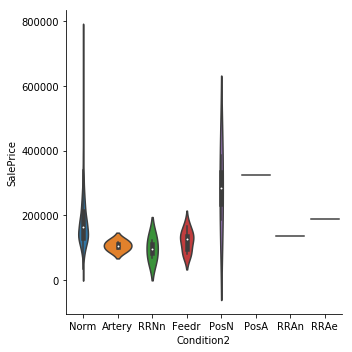

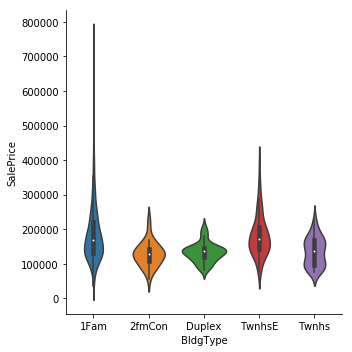

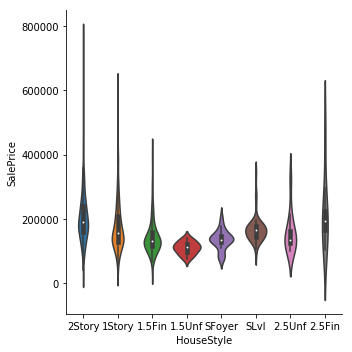

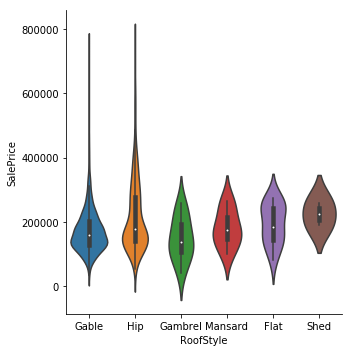

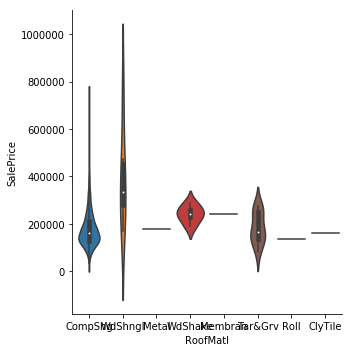

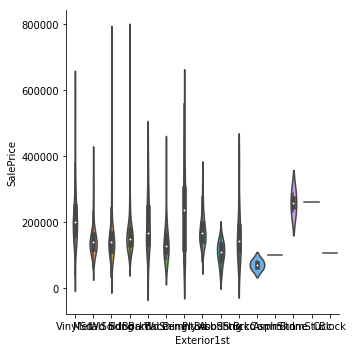

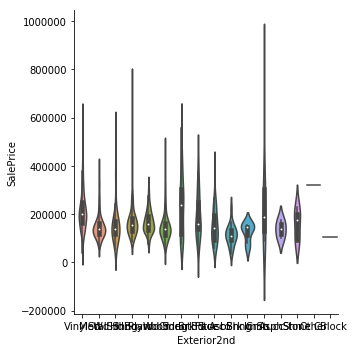

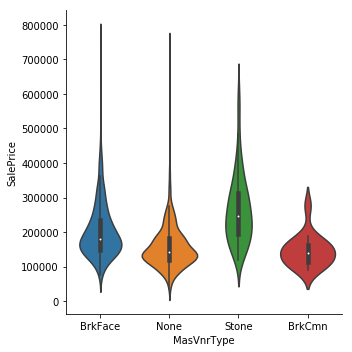

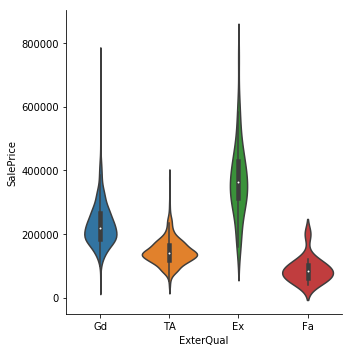

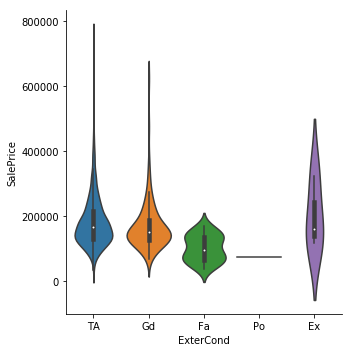

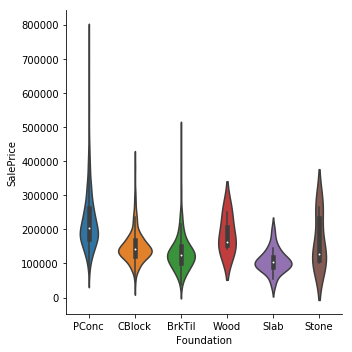

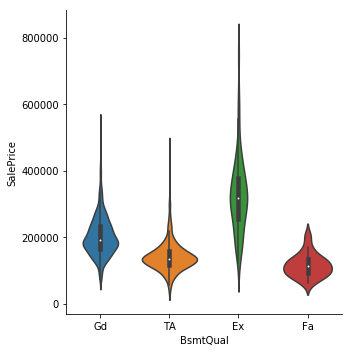

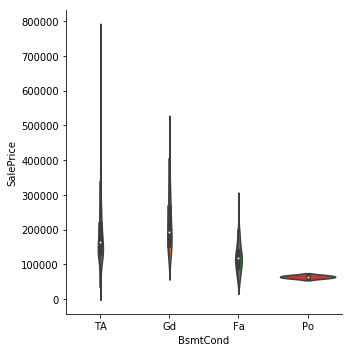

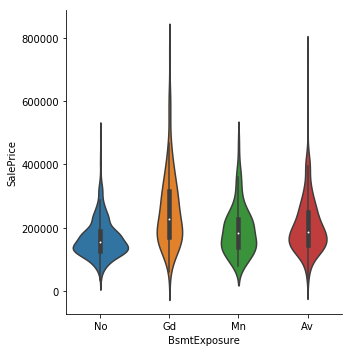

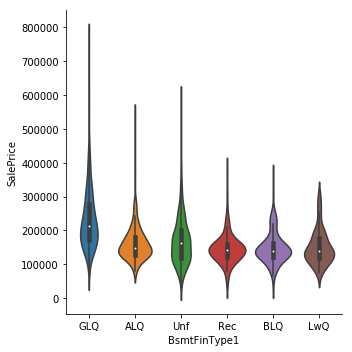

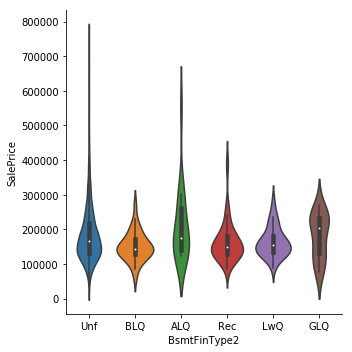

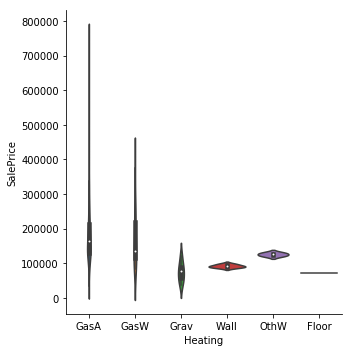

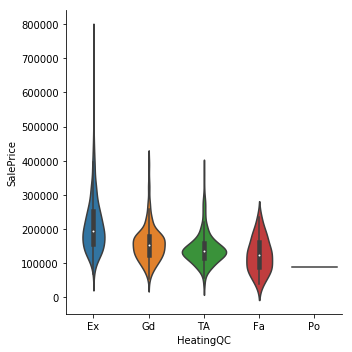

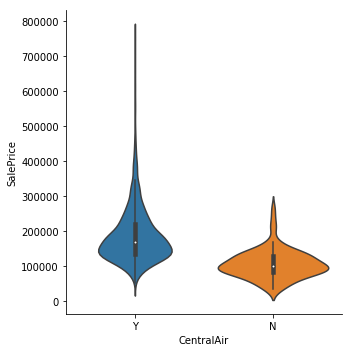

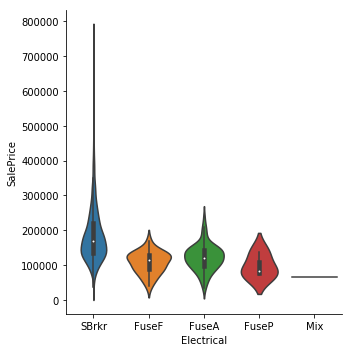

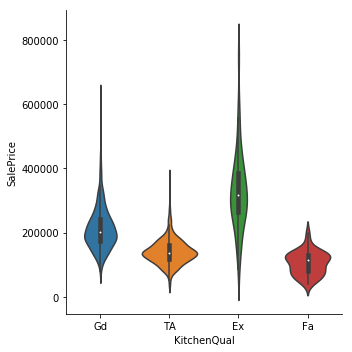

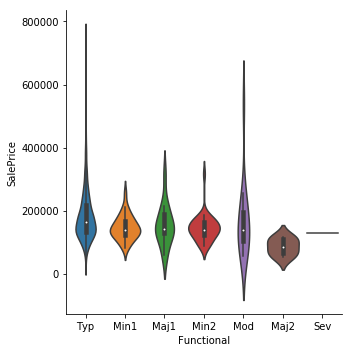

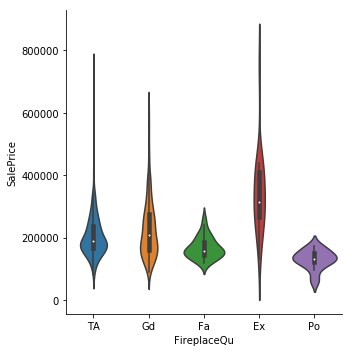

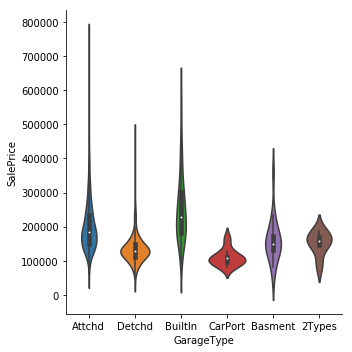

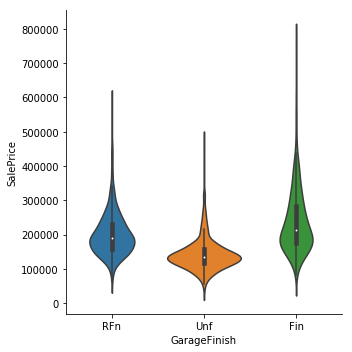

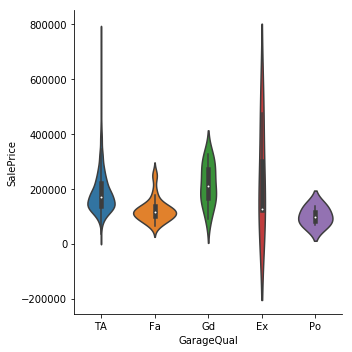

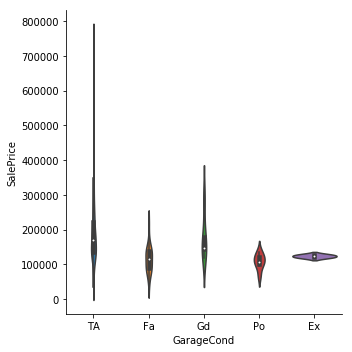

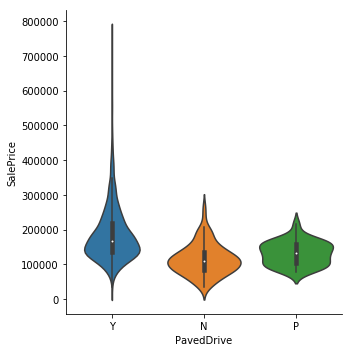

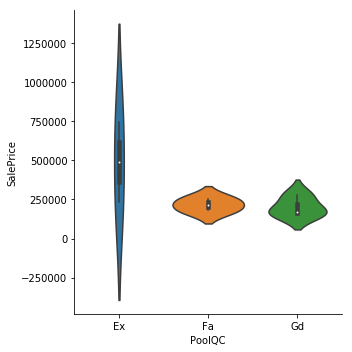

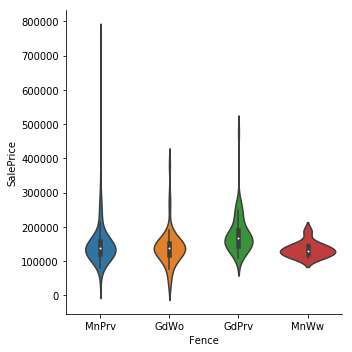

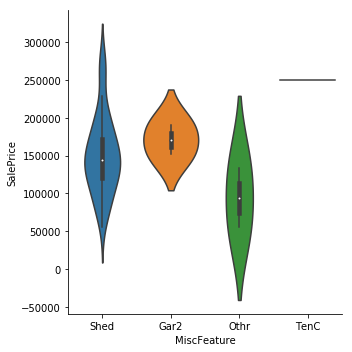

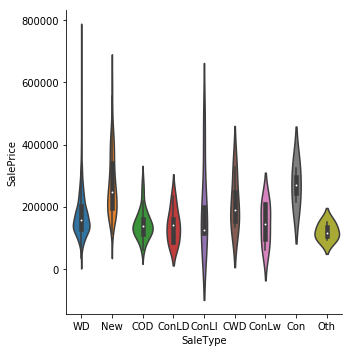

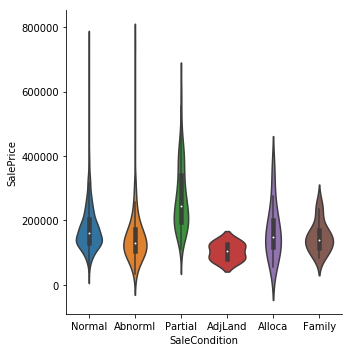

In [9]:
# fig, ax=plt.subplot()
for col in Objects:
#     for i in range (1,45):
#         plt.subplot(9,5,i)
        sns.catplot(x=col,y="SalePrice", kind="violin",data=D)
    

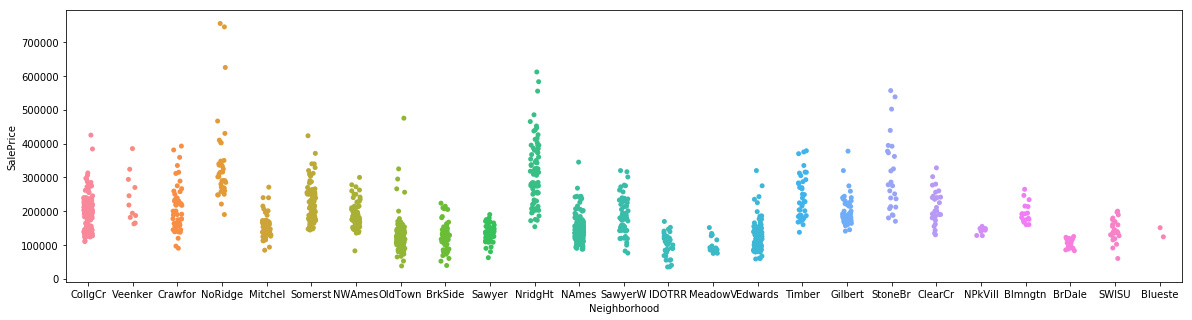

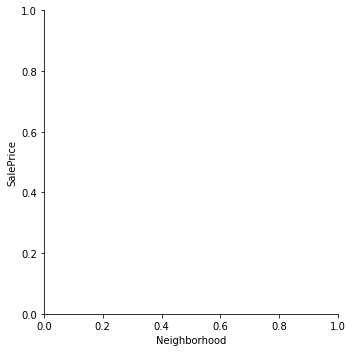

In [25]:
# SaleQuality=D.groupby("SalePrice")["OverallQual"].count()a
fig,ax=plt.subplots(figsize=(20,5))
sns.catplot(x="Neighborhood", y="SalePrice",data=D,ax=ax);

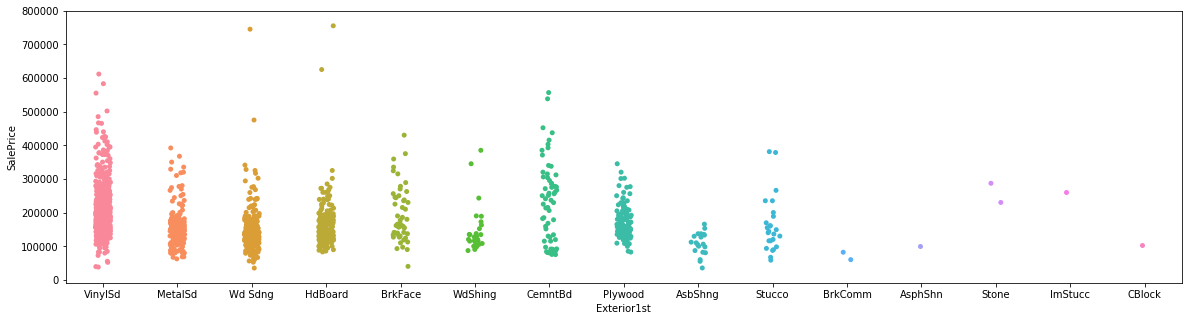

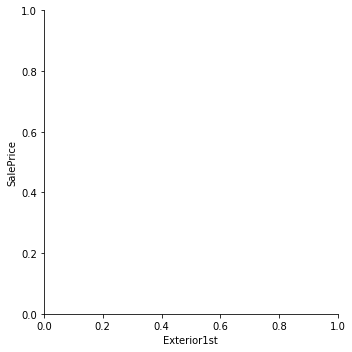

In [29]:
# SaleQuality=D.groupby("SalePrice")["OverallQual"].count()a
fig,ax=plt.subplots(figsize=(20,5))
sns.catplot(x="Exterior1st", y="SalePrice",data=D,ax=ax);

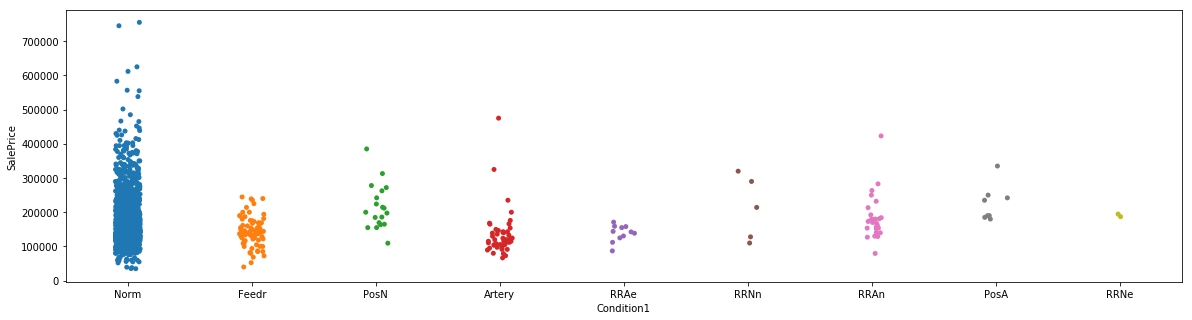

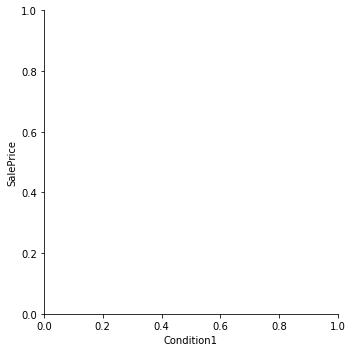

In [26]:
# SaleQuality=D.groupby("SalePrice")["OverallQual"].count()a
fig,ax=plt.subplots(figsize=(20,5))
sns.catplot(x="Condition1", y="SalePrice",data=D,ax=ax);

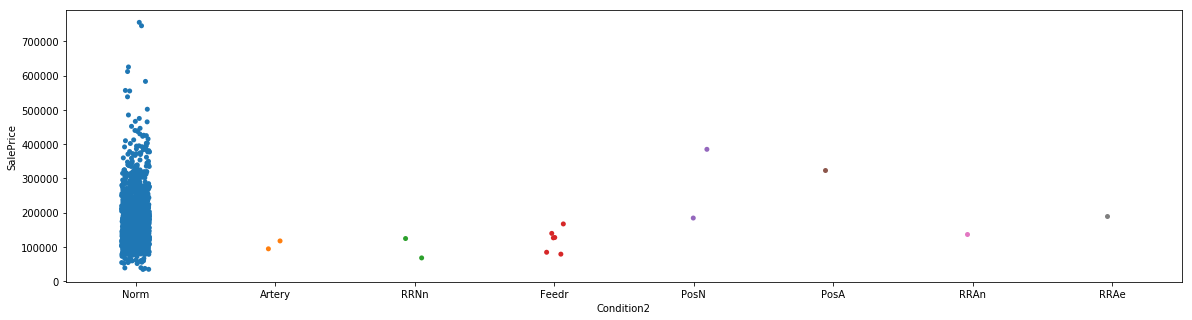

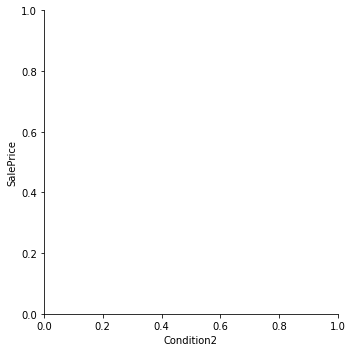

In [27]:
# SaleQuality=D.groupby("SalePrice")["OverallQual"].count()a
fig,ax=plt.subplots(figsize=(20,5))
sns.catplot(x="Condition2", y="SalePrice",data=D,ax=ax);

/home/charlie/environments/PFDS/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


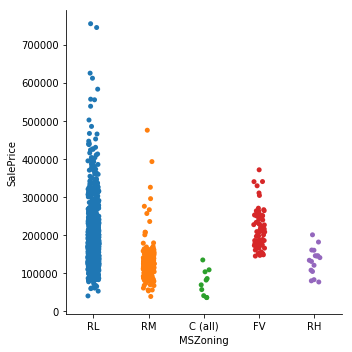

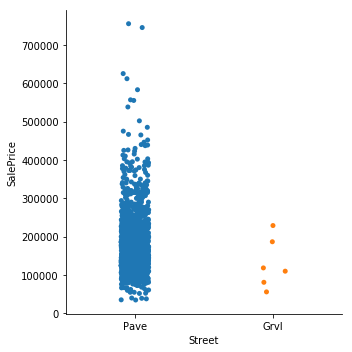

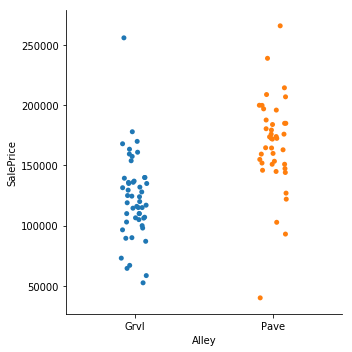

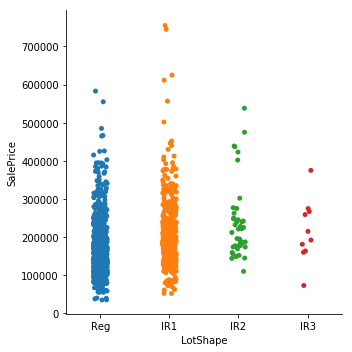

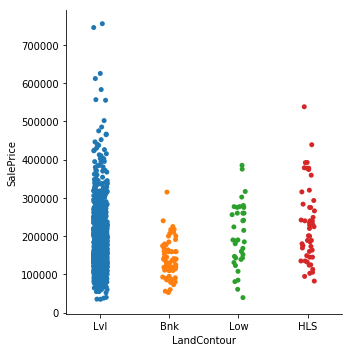

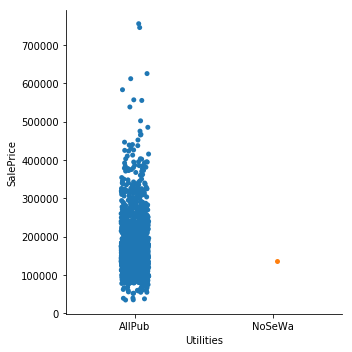

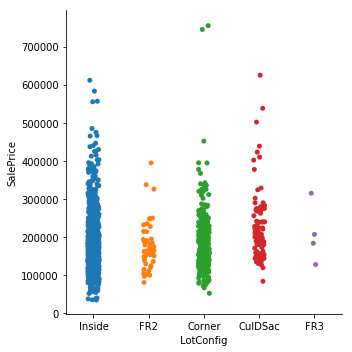

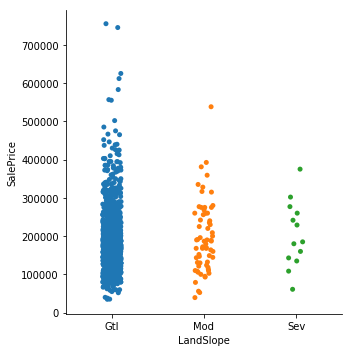

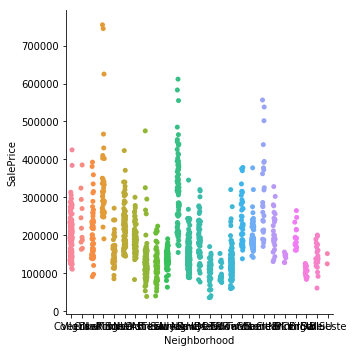

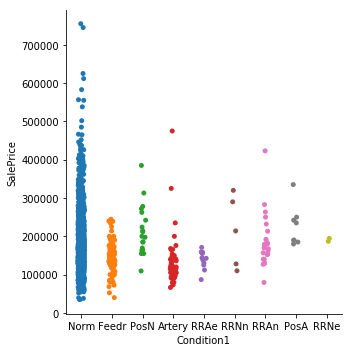

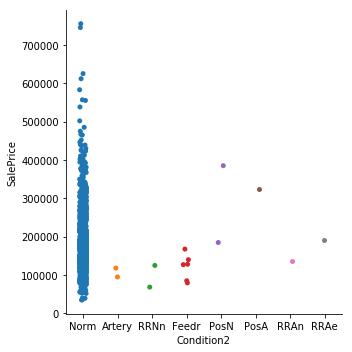

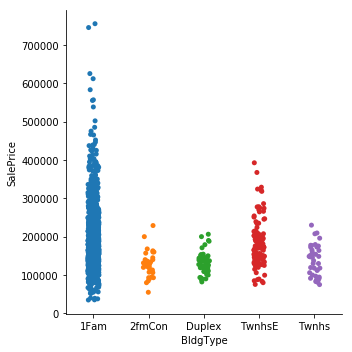

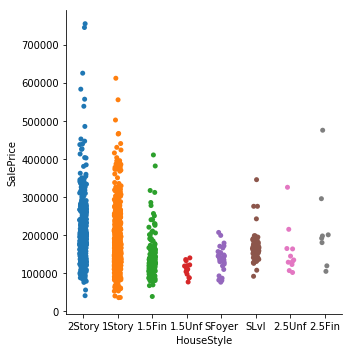

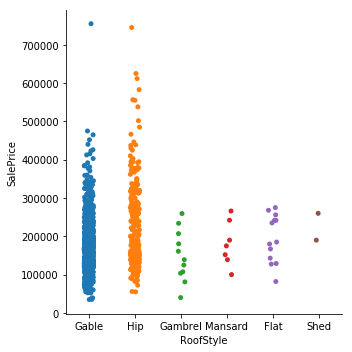

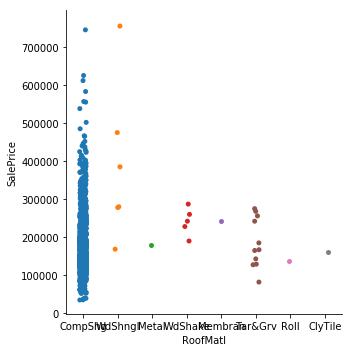

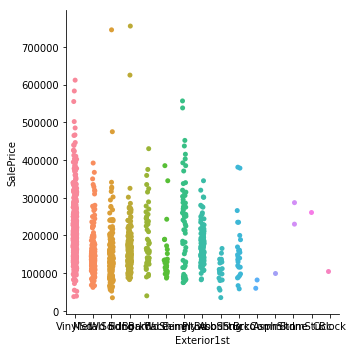

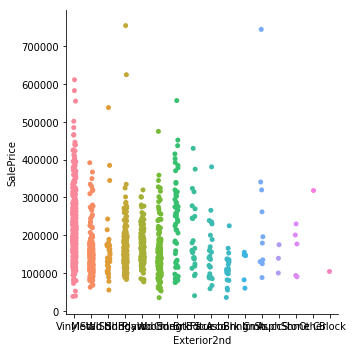

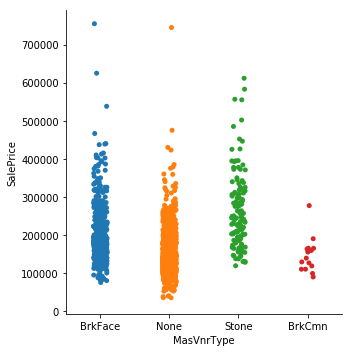

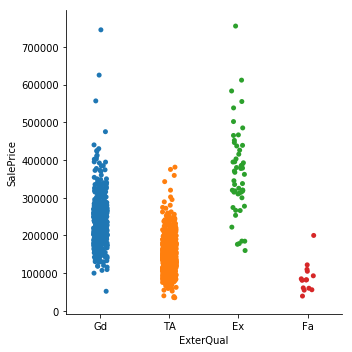

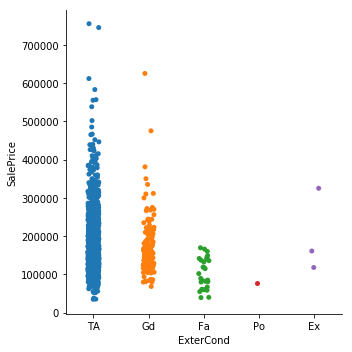

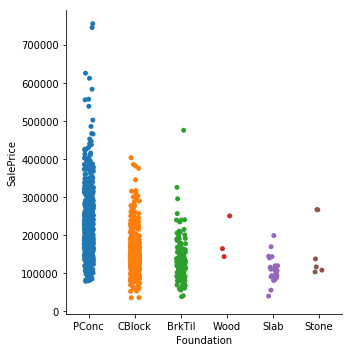

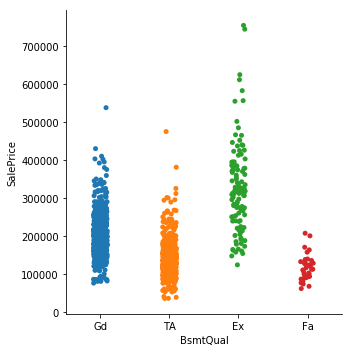

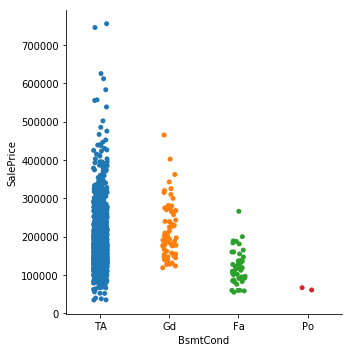

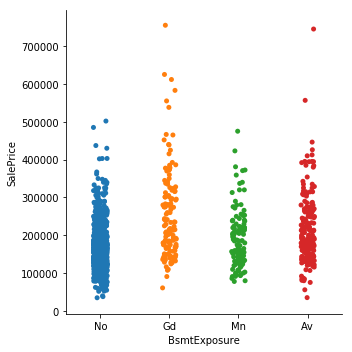

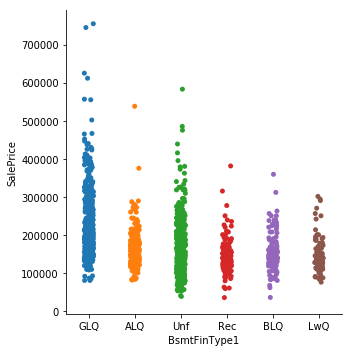

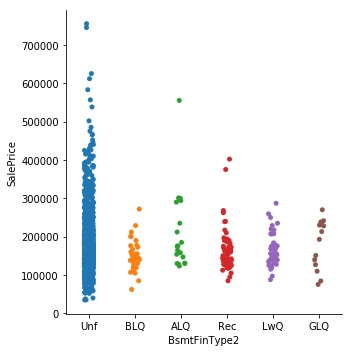

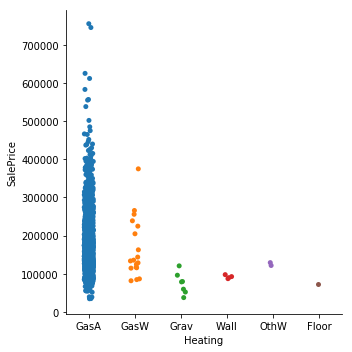

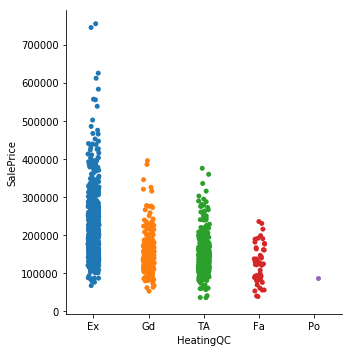

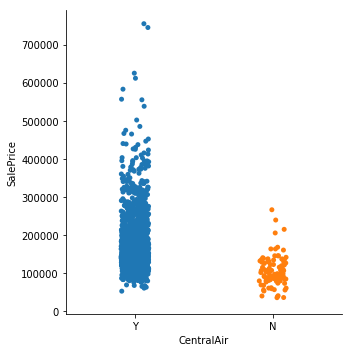

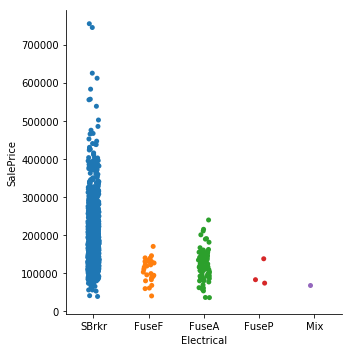

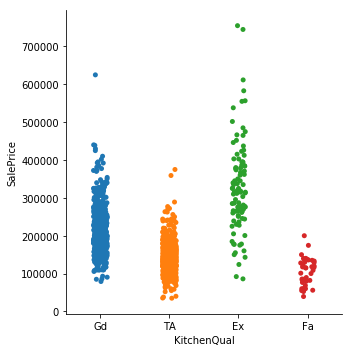

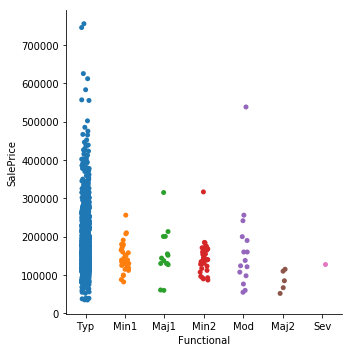

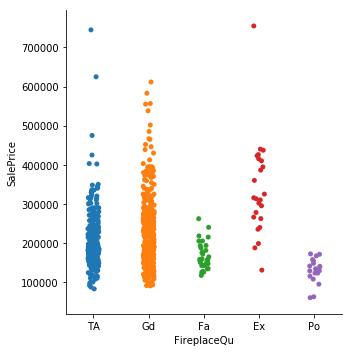

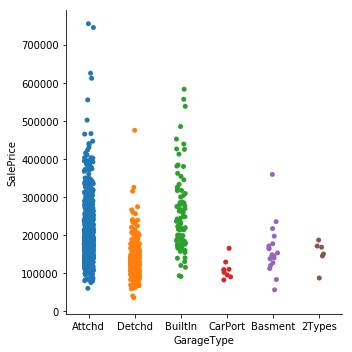

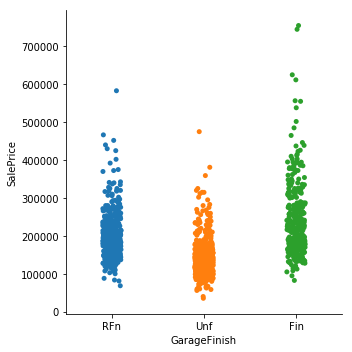

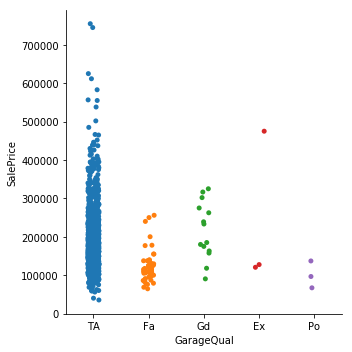

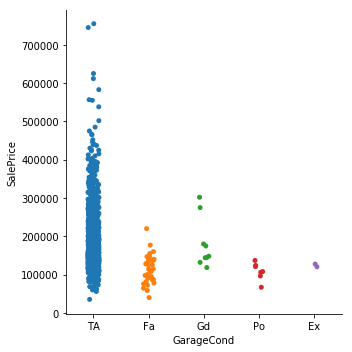

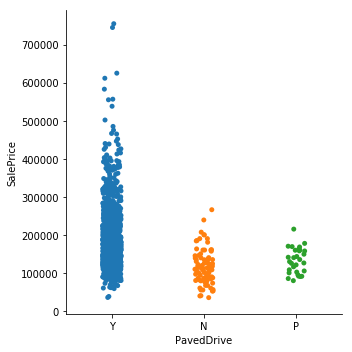

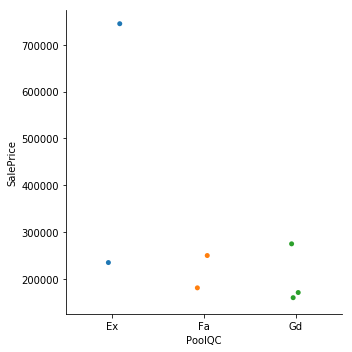

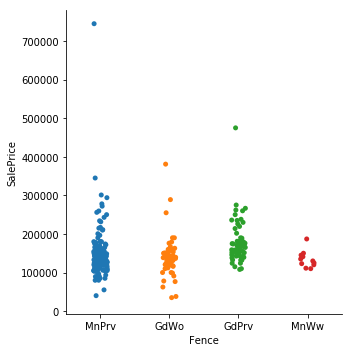

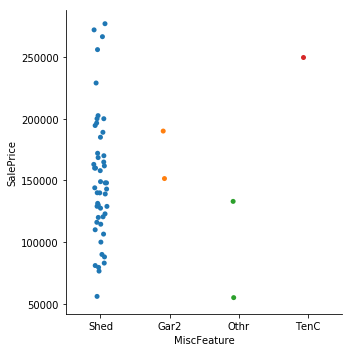

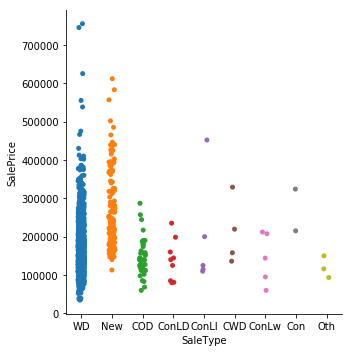

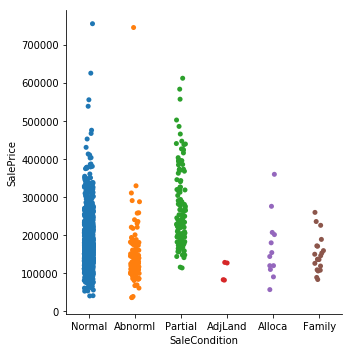

In [13]:
for col in Objects:
#     for i in range (1,45):
#         plt.subplot(9,5,i)
        sns.catplot(x=col,y="SalePrice",data=D)
    

From these plot, there are obviously categories with very little data that are oulier, so these will be grouped as others, then there are categories for example in neighbourhood where a bunch of them seem to fall under one price range and others at another sot hese should be grouped accordingly so as to avoid overfitting. again there are categories where the data in one category is very high and others are neglible. We can Observe these by count etc but for now I am just going to drop them. A very important point to note here is that because the whole data set is skewed, its hard to have a good visual estimate. I am going to look for a way to deal with the skewness: ie the bulk of the data in this case being in the range of 100-300k sale price.edit: it turns out that skewed data affects the models, much like I anticipated.

/home/charlie/environments/PFDS/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


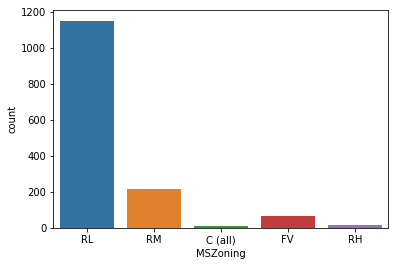

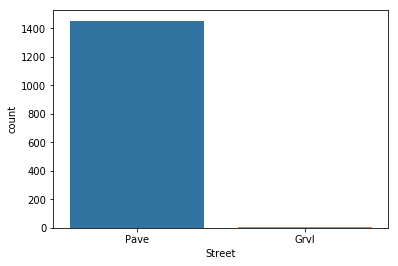

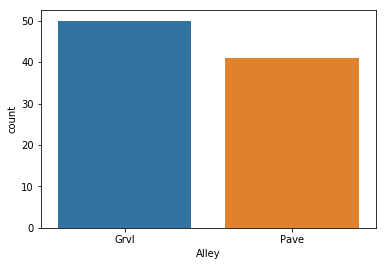

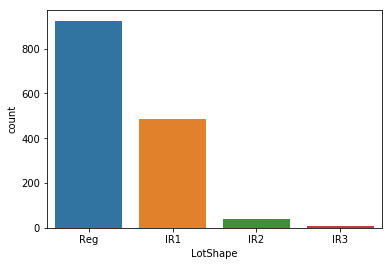

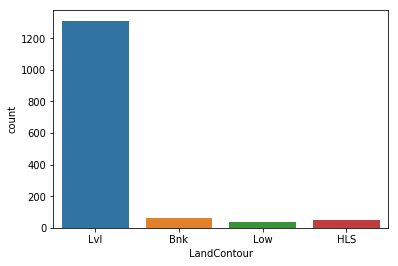

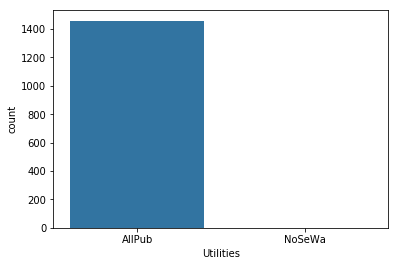

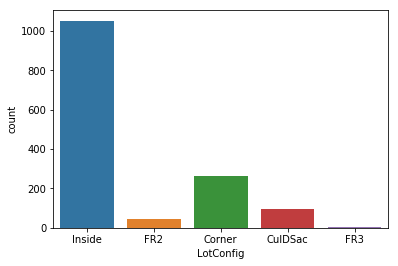

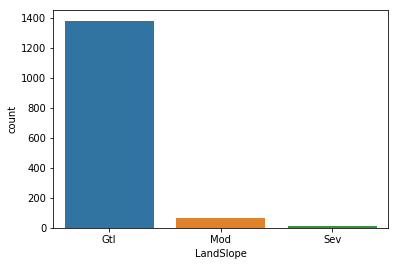

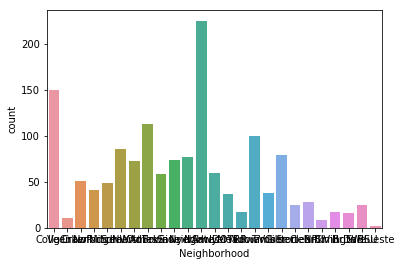

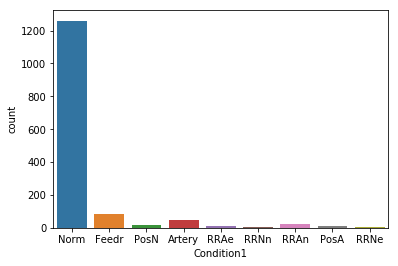

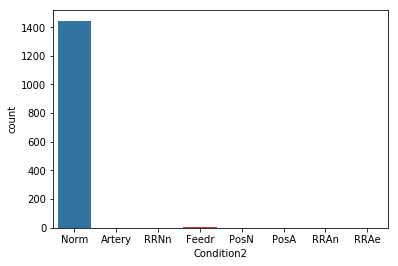

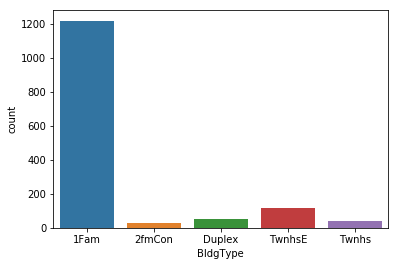

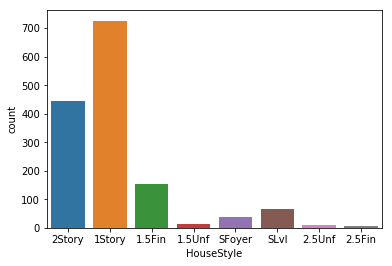

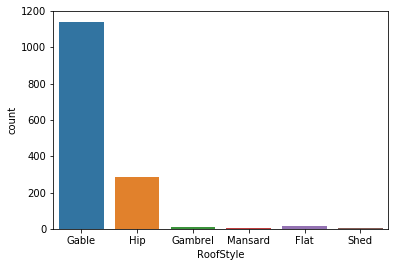

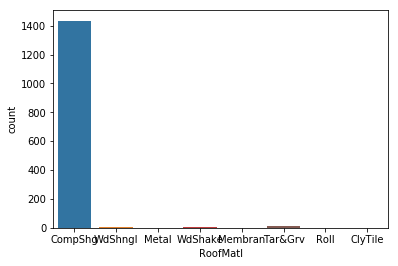

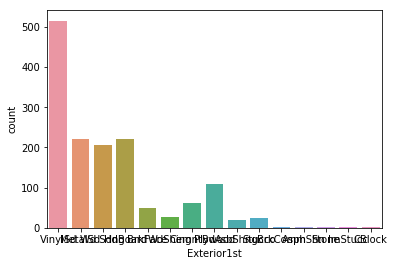

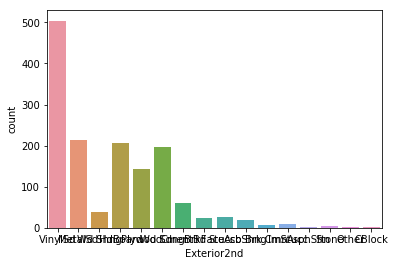

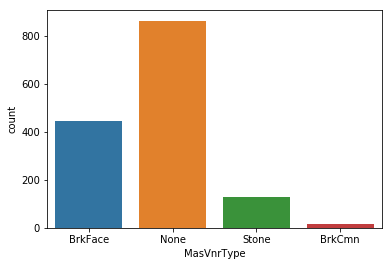

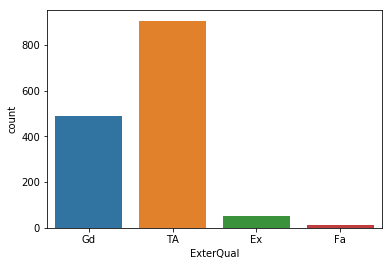

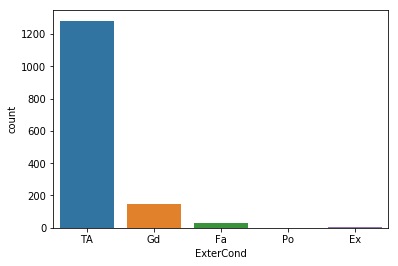

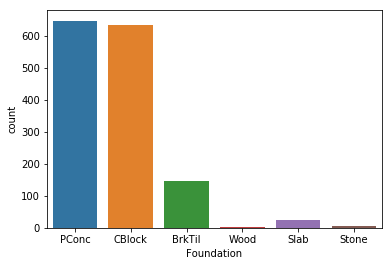

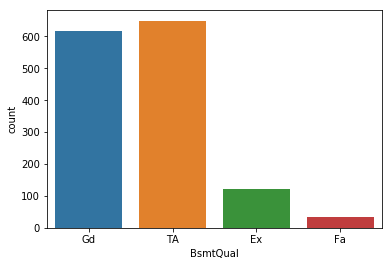

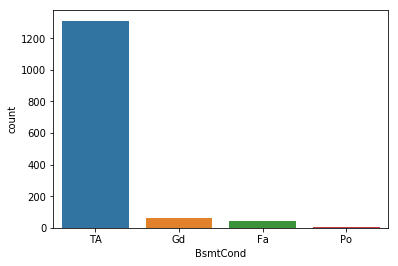

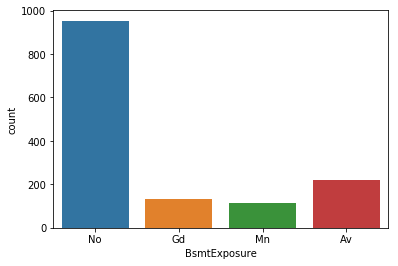

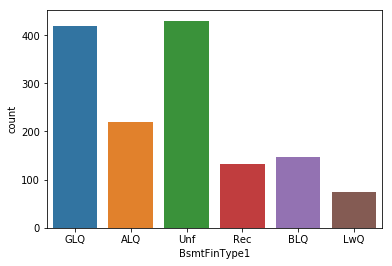

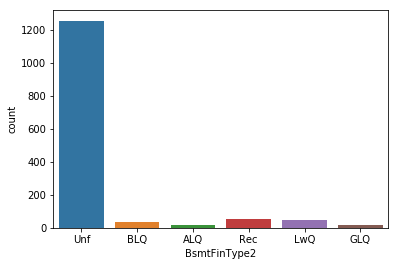

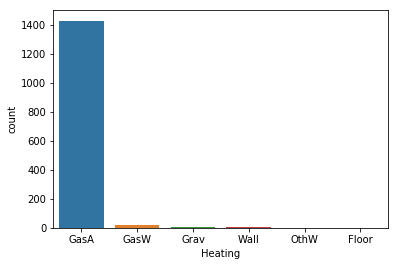

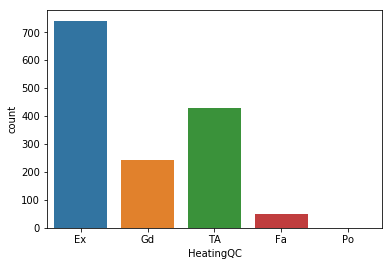

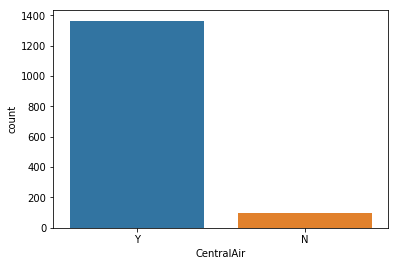

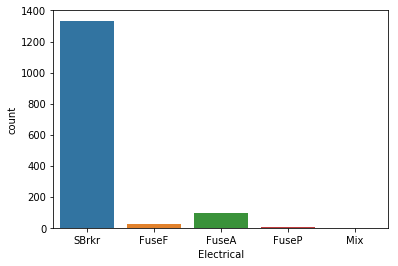

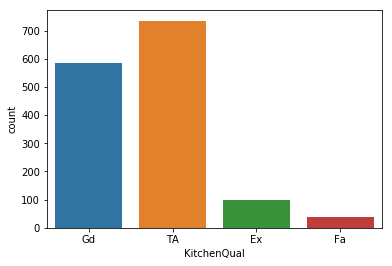

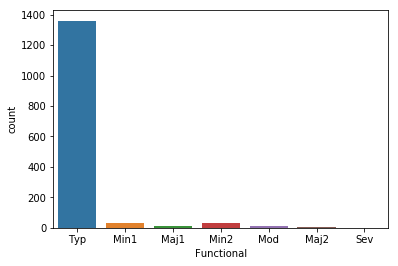

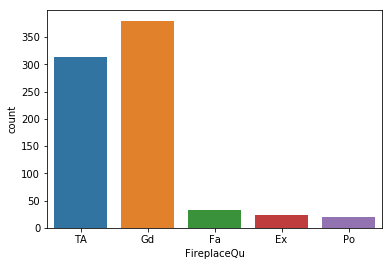

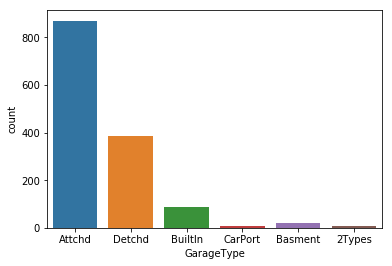

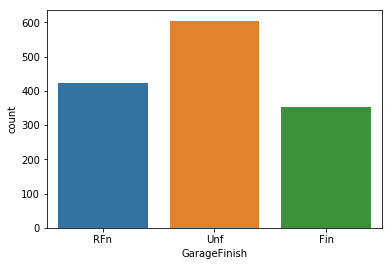

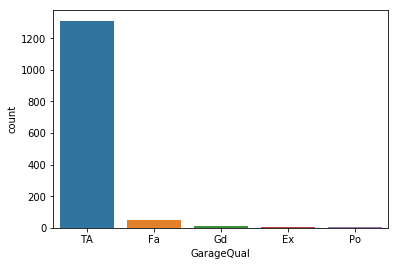

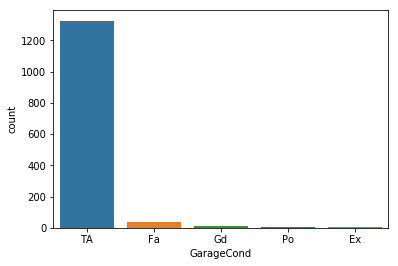

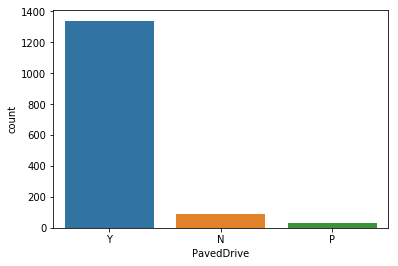

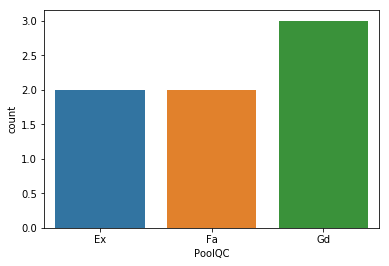

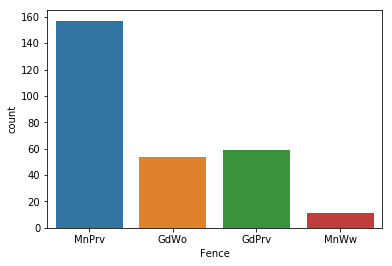

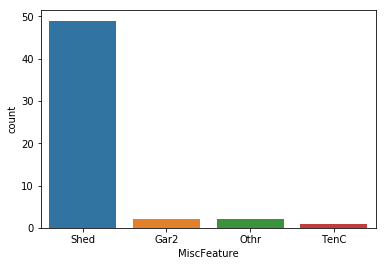

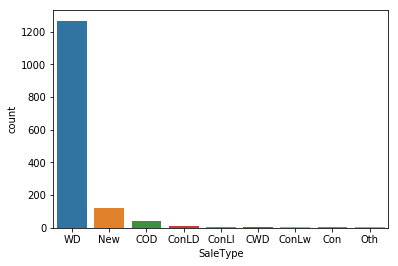

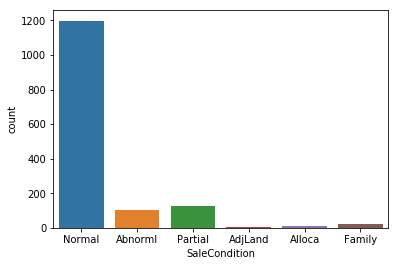

In [11]:
for col in Objects:
    plt.figure()
    sns.countplot(x=col,data=D)
#         print(col)
    

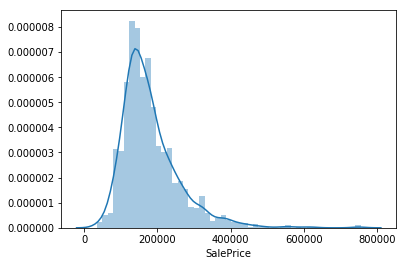

In [16]:
plt.figure()
sns.distplot(D.SalePrice)

In [17]:
D2=D[D.SalePrice>500000]

In [19]:
D2.T

,178,440,691,769,803,898,1046,1169,1182
Id,179,441,692,770,804,899,1047,1170,1183
MSSubClass,20,20,60,60,60,20,60,60,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RL
LotFrontage,63,105,104,47,107,100,85,118,160
LotArea,17423,15431,21535,53504,13891,12919,16056,35760,15623
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,IR1,Reg,IR1,IR2,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
